In [1]:
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
import math as m
import matplotlib as mpl
from matplotlib.pyplot import cm
import re
import argparse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.classes import *

sns.set_context("paper", rc={"font.size":14})

In [2]:
region_marker_dict= {'STR': ['PENK', 'ADORA2A', 'PPP1R1B'],
                         'SN': ['TH', 'PBX1', 'SLC6A3', 'ALDH1A1', 'DDC', 'RET']}
animal_mapping = {'CN56': 'Nude-2', 'ST3': 'Nude-1', 'CN57': 'WT-3', 'CN53': 'Nude-3', 'ST1': 'WT-1'}

In [3]:
singler_file = '../../results/SingleR/hESC_TX_sc_SingleR_analysis_2000_ast_merged.tsv'
singleR_df = pd.read_csv(singler_file, sep='\t', header=0, index_col=0)
singleR_df['Celltype_SingleR'] = singleR_df['Celltype_SingleR'].astype('category')
singleR_df

,c..rat11.1a_AAAGATGGTGTAACGG.1....rat11.1a_AAAGTAGCAGGAACGT.1...,Celltype_SingleR,cluster,umap1,umap2
1,rat11-1a_AAAGATGGTGTAACGG-1,Vascular leptomeningeal cells; mouse,1,2.715782,-8.870185
2,rat11-1a_AAAGTAGCAGGAACGT-1,Neuronal intermidate progenitor cells,0,-5.531876,2.146267
3,rat11-1a_AAATGCCAGCAACGGT-1,Astrocytes; mouse,0,-0.176593,3.554566
4,rat11-1a_AACACGTTCATGTCCC-1,Vascular leptomeningeal cells; mouse,0,-0.996965,4.126979
5,rat11-1a_AACTCTTAGTAGATGT-1,Vascular leptomeningeal cells; mouse,0,-4.189439,0.044979
...,...,...,...,...,...
7871,rat45-1b_TTTGTCACAGTAAGCG-1,Vascular leptomeningeal cells; mouse,0,-1.947990,0.824142
7872,rat45-1b_TTTGTCAGTCTACCTC-1,Neuronal intermidate progenitor cells,0,-0.574730,-0.069834
7873,rat45-1b_TTTGTCAGTTGCGCAC-1,Neuronal intermidate progenitor cells,0,1.210748,2.583290
7874,rat45-1b_TTTGTCATCCACGTTC-1,Astrocytes; mouse,0,-5.182932,2.881242


In [4]:
sr_dataset = singler_file.split('SingleR_analysis_')[1].replace('.tsv', '')
sr_dataset

'2000_ast_merged'

In [5]:
singleR_counts = singleR_df['Celltype_SingleR'].value_counts()
singleR_counts = singleR_counts[singleR_counts>20]
singleR_counts

Vascular leptomeningeal cells; mouse               4589
Neuronal intermidate progenitor cells              1125
Subventricular zone radial glia-like cells          953
Astrocytes; mouse                                   585
Dentate gyrus radial glia-like cells                430
Dopaminergic neurons; mouse                          84
Hippocamposeptal projection, cortex/hippocampus      40
Name: Celltype_SingleR, dtype: int64

In [48]:
plot_singleR(singleR_counts, singleR_df, output='./')

NameError: name 'plot_singleR' is not defined

In [7]:
deconv_h5ad_path = '../../results/cell2loc_res/L5_CTX_M_STR_description_selection_2000_astro-merge/TX/cell2location_map/sp.h5ad'
cluster_regions_h5ad_path = '../../results/Batch_corrections/seurat/TX/TX_st_adata_cluster_regions.h5ad'
cluster_h5ad_path = '../../results/Batch_corrections/seurat/TX/TX_st_adata_cluster.h5ad'

deconv_h5ad = sc.read_h5ad(deconv_h5ad_path)
cluster_h5ad = sc.read_h5ad(cluster_h5ad_path)
cluster_region_h5ad = sc.read_h5ad(cluster_regions_h5ad_path)


cluster_h5ad.obs

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


,feature,orig_feature,array_row,array_col,in_tissue,sample,slide,x,y,new_x,...,n_transcripts,G_content,RNOG_content,median_gene_feature,median_transcript_feature,MT_perc,ribo_perc,cluster,umap1,umap2
0,X4.95_14.07,X5_14,5.0,14.0,1,ST3_C2,ST3,5,14,4.95,...,3103.0,0.043829,0.956171,2540.0,6252.0,0.100491,0.012089,1,8.031024,-3.072167
1,X4.95_11.06,X5_11,5.0,11.0,1,ST3_C2,ST3,5,11,4.95,...,3852.0,0.043614,0.956386,2540.0,6252.0,0.084567,0.011477,7,-8.691315,2.167050
2,X15.94_14.05,X16_14,16.0,14.0,1,ST3_C2,ST3,16,14,15.94,...,2686.0,0.076694,0.923306,2540.0,6252.0,0.089566,0.008061,1,7.663454,-1.368829
3,X8.01_14.97,X8_15,8.0,15.0,1,ST3_C2,ST3,8,15,8.01,...,2082.0,0.046110,0.953890,2540.0,6252.0,0.103179,0.007808,3,9.302334,-2.523148
4,X10.91_24.02,X11_24,11.0,24.0,1,ST3_C2,ST3,11,24,10.91,...,3651.0,0.036428,0.963572,2540.0,6252.0,0.119331,0.009649,1,8.312225,-2.340227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,X19.95_20.05,X20_20,20.0,20.0,1,CN53_C1,CN53,20,20,19.95,...,3023.0,0.085346,0.914654,2540.0,6252.0,0.106814,0.006998,1,5.972613,-5.339270
8202,X23.22_30.02,X23_30,23.0,30.0,1,CN53_C1,CN53,23,30,23.22,...,7514.0,0.072931,0.927069,2540.0,6252.0,0.074495,0.010621,8,-8.725953,5.305123
8203,X19.85_13.09,X20_13,20.0,13.0,1,CN53_C1,CN53,20,13,19.85,...,5266.0,0.117736,0.882264,2540.0,6252.0,0.092042,0.010275,1,8.206357,-4.496455
8204,X24.1_26.01,X24_26,24.0,26.0,1,CN53_C1,CN53,24,26,24.10,...,4717.0,0.080984,0.919016,2540.0,6252.0,0.084323,0.009976,5,-5.498800,-0.374072


In [8]:
cluster_region_h5ad.obs[['sample', 'cluster', 'region']]
cluster_region_dict = cluster_region_h5ad.obs[['cluster', 'region']]
cluster_region_dict.set_index('cluster', inplace=True)
cluster_region_dict = cluster_region_dict['region'].to_dict()
cluster_region_dict

{'1': 'STR',
 '10': 'other',
 '11': 'TX',
 '12': 'other',
 '13': 'other',
 '2': 'other',
 '3': 'STR',
 '4': 'other',
 '5': 'other',
 '6': 'other',
 '7': 'other',
 '8': 'other',
 '9': 'other'}

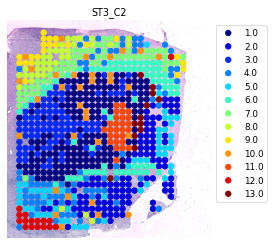

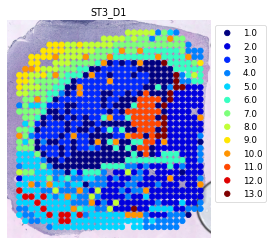

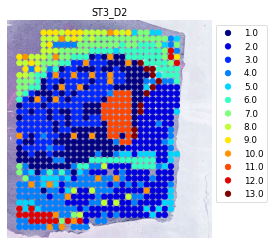

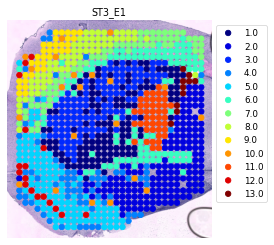

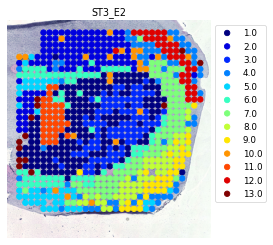

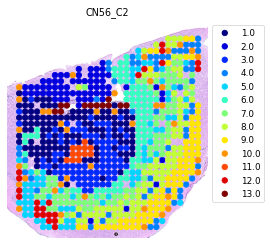

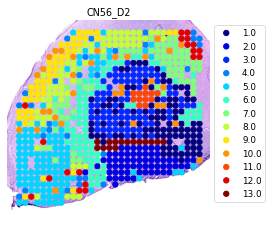

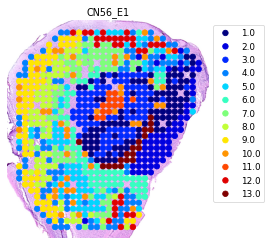

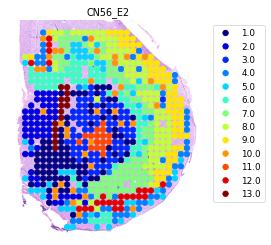

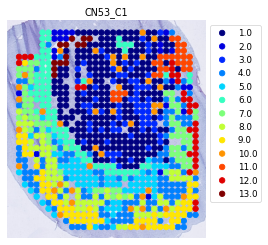

<Figure size 432x288 with 0 Axes>

In [9]:
samples= cluster_h5ad.obs['sample'].unique()
for sample in samples:
    plot_ST(cluster_h5ad, sample)

In [10]:
cluster_type = type(list(cluster_region_dict.keys())[0])

In [11]:
cluster_h5ad.obs['cluster'] = cluster_h5ad.obs['cluster'].astype(cluster_type)
cluster_h5ad.obs['region'] = cluster_h5ad.obs['cluster'].map(cluster_region_dict)
cluster_h5ad.obs[['sample', 'cluster', 'region']]

,sample,cluster,region
0,ST3_C2,1,STR
1,ST3_C2,7,other
2,ST3_C2,1,STR
3,ST3_C2,3,STR
4,ST3_C2,1,STR
...,...,...,...
8201,CN53_C1,1,STR
8202,CN53_C1,8,other
8203,CN53_C1,1,STR
8204,CN53_C1,5,other


In [22]:
cluster_h5ad.obs.index = cluster_h5ad.obs['sample'].astype('str') + '_' + cluster_h5ad.obs['feature'].astype('str')
deconv_df = deconv_h5ad.obsm['q05_cell_abundance_w_sf']
deconv_df.columns = [x.replace('q05cell_abundance_w_sf_', '') for x in deconv_df.columns]
deconv_df_perc = deconv_df.div(deconv_df.sum(axis=1), axis=0)
celltypes = deconv_df.columns

strip_df_perc = cluster_h5ad.obs.join(deconv_df_perc)
unique_regions = len(strip_df_perc[strip_df_perc['region'] != 'other']['region'].unique())
if unique_regions > 1:
    strip_df_perc = strip_df_perc[strip_df_perc['region'] != 'other']

regions = list(strip_df_perc['region'].unique())
strip_df_perc.columns

Index(['feature', 'orig_feature', 'array_row', 'array_col', 'in_tissue',
       'sample', 'slide', 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y',
       'n_transcripts', 'G_content', 'RNOG_content', 'median_gene_feature',
       'median_transcript_feature', 'MT_perc', 'ribo_perc', 'cluster', 'umap1',
       'umap2', 'region', 'Astrocytes; mouse',
       'Axo-axonic, cortex/hippocampus',
       'Basket and bistratified cells, cortex/hippocampus',
       'CGE-derived neurogliaform cells Cxcl14+, cortex/hippocampus',
       'CGE-derived neurogliaform cells, cortex/hippocampus',
       'Cholinergic interneurons; mouse',
       'Cholinergic neurons, midbrain red nucleus',
       'Cortical projection neurons; mouse', 'D1 Medium Spiny Neurons; mouse',
       'D1/D2 Medium Spiny Neurons, striatum',
       'D2 Medium Spiny Neurons; mouse',
       'Dentate gyrus radial glia-like cells', 'Dopaminergic neurons; mouse',
       'Excitatory neurons, amygdala', 'Excitatory neurons, hippocampus CA1'

In [26]:
cols = ['sample', 'feature', 'cluster'] + list(deconv_df_perc.columns)

plot_export_df = strip_df_perc[cols]
plot_export_df['region'] = plot_export_df['cluster'].map(cluster_region_dict)
plot_export_df

/tmp/ipykernel_6147/1964313868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_export_df['region'] = plot_export_df['cluster'].map(cluster_region_dict)


,sample,feature,cluster,Astrocytes; mouse,"Axo-axonic, cortex/hippocampus","Basket and bistratified cells, cortex/hippocampus","CGE-derived neurogliaform cells Cxcl14+, cortex/hippocampus","CGE-derived neurogliaform cells, cortex/hippocampus",Cholinergic interneurons; mouse,"Cholinergic neurons, midbrain red nucleus",...,Neuroblasts,Neuronal intermidate progenitor cells,"Non-border Cck interneurons, cortex/hippocampus",Oligodendrocytes,"R-LM border Cck interneurons, cortex/hippocampus","Sleep-active, long-range projection interneurons, cortex/hippocampus",Subventricular zone radial glia-like cells,Vascular leptomeningeal cells; mouse,Vascular; mouse,region
ST3_C2_X4.95_14.07,ST3_C2,X4.95_14.07,1,0.115753,0.002072,0.002736,0.001710,0.004325,0.007123,0.003856,...,0.006572,0.013394,0.003096,0.081506,0.001777,0.007023,0.028859,0.016716,0.018955,STR
ST3_C2_X15.94_14.05,ST3_C2,X15.94_14.05,1,0.168638,0.002273,0.003372,0.001664,0.002679,0.034096,0.002477,...,0.006785,0.027527,0.003517,0.145632,0.002335,0.012107,0.027046,0.022110,0.018923,STR
ST3_C2_X8.01_14.97,ST3_C2,X8.01_14.97,3,0.149365,0.001497,0.002107,0.001729,0.005380,0.007671,0.005682,...,0.003389,0.012985,0.001523,0.074357,0.001034,0.008826,0.028898,0.003172,0.024585,STR
ST3_C2_X10.91_24.02,ST3_C2,X10.91_24.02,1,0.132342,0.003068,0.003387,0.002318,0.005512,0.009465,0.006441,...,0.005728,0.018194,0.005700,0.040057,0.002221,0.012024,0.046988,0.001733,0.011259,STR
ST3_C2_X20.06_17.98,ST3_C2,X20.06_17.98,11,0.191614,0.002216,0.000861,0.001537,0.001634,0.054648,0.006640,...,0.016747,0.114242,0.001804,0.030056,0.000484,0.032215,0.032878,0.000622,0.014137,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN53_C1_X9.5_9.15,CN53_C1,X9.5_9.15,1,0.081776,0.005389,0.004756,0.003701,0.006412,0.008899,0.009224,...,0.005343,0.026470,0.006641,0.039719,0.005704,0.008969,0.065190,0.014618,0.046154,STR
CN53_C1_X11.84_7.06,CN53_C1,X11.84_7.06,1,0.107668,0.004565,0.005699,0.003780,0.007129,0.012242,0.006948,...,0.008083,0.029007,0.003410,0.052080,0.001975,0.011326,0.050411,0.016088,0.039605,STR
CN53_C1_X9.33_15.25,CN53_C1,X9.33_15.25,1,0.113160,0.004178,0.009195,0.004642,0.006261,0.019156,0.006357,...,0.008646,0.020461,0.002309,0.078902,0.001994,0.012033,0.037412,0.017389,0.052710,STR
CN53_C1_X19.95_20.05,CN53_C1,X19.95_20.05,1,0.098866,0.003451,0.004145,0.002625,0.004149,0.008864,0.006849,...,0.007122,0.025006,0.004238,0.083634,0.006537,0.007236,0.052802,0.022878,0.025480,STR


In [32]:
plot_export_TX_df = plot_export_df.copy()
plot_export_TX_df.loc[(plot_export_TX_df['region']!='TX'), list(deconv_df_perc.columns)] = -0.001
plot_export_TX_df

,sample,feature,cluster,Astrocytes; mouse,"Axo-axonic, cortex/hippocampus","Basket and bistratified cells, cortex/hippocampus","CGE-derived neurogliaform cells Cxcl14+, cortex/hippocampus","CGE-derived neurogliaform cells, cortex/hippocampus",Cholinergic interneurons; mouse,"Cholinergic neurons, midbrain red nucleus",...,Neuroblasts,Neuronal intermidate progenitor cells,"Non-border Cck interneurons, cortex/hippocampus",Oligodendrocytes,"R-LM border Cck interneurons, cortex/hippocampus","Sleep-active, long-range projection interneurons, cortex/hippocampus",Subventricular zone radial glia-like cells,Vascular leptomeningeal cells; mouse,Vascular; mouse,region
ST3_C2_X4.95_14.07,ST3_C2,X4.95_14.07,1,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.00100,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,STR
ST3_C2_X15.94_14.05,ST3_C2,X15.94_14.05,1,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.00100,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,STR
ST3_C2_X8.01_14.97,ST3_C2,X8.01_14.97,3,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.00100,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,STR
ST3_C2_X10.91_24.02,ST3_C2,X10.91_24.02,1,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.00100,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,STR
ST3_C2_X20.06_17.98,ST3_C2,X20.06_17.98,11,0.191614,0.002216,0.000861,0.001537,0.001634,0.054648,0.00664,...,0.016747,0.114242,0.001804,0.030056,0.000484,0.032215,0.032878,0.000622,0.014137,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN53_C1_X9.5_9.15,CN53_C1,X9.5_9.15,1,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.00100,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,STR
CN53_C1_X11.84_7.06,CN53_C1,X11.84_7.06,1,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.00100,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,STR
CN53_C1_X9.33_15.25,CN53_C1,X9.33_15.25,1,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.00100,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,STR
CN53_C1_X19.95_20.05,CN53_C1,X19.95_20.05,1,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.00100,...,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,STR


In [121]:
genes = ['TH', 'COL1A1', 'RET']

In [122]:
strip_df_stacked = pd.DataFrame()
for ct in celltypes:
    strip_df_ct = strip_df_perc.copy()
    strip_df_ct['celltype'] = ct
    strip_df_ct['celltype_perc'] = strip_df_perc[ct]
    strip_df_ct[genes] = cluster_h5ad[cluster_h5ad.obs['region'].isin(regions), genes].X
    strip_df_stacked = pd.concat([strip_df_stacked, strip_df_ct])
strip_df_stacked

,feature,orig_feature,array_row,array_col,in_tissue,sample,slide,x,y,new_x,...,"R-LM border Cck interneurons, cortex/hippocampus","Sleep-active, long-range projection interneurons, cortex/hippocampus",Subventricular zone radial glia-like cells,Vascular leptomeningeal cells; mouse,Vascular; mouse,celltype,celltype_perc,TH,COL1A1,RET
CN57_E1_X25.97_9.07,X25.97_9.07,X26_9,26.0,9.0,1,CN57_E1,CN57,26,9,25.97,...,0.007642,0.020972,0.068205,0.028890,0.046599,Astrocytes; mouse,0.191752,1.0,1.0,0.0
CN57_E1_X15.91_15.95,X15.91_15.95,X16_16,16.0,16.0,1,CN57_E1,CN57,16,16,15.91,...,0.003189,0.070065,0.025779,0.022228,0.014227,Astrocytes; mouse,0.211611,1.0,1.0,0.0
CN57_E1_X25.96_6.08,X25.96_6.08,X26_6,26.0,6.0,1,CN57_E1,CN57,26,6,25.96,...,0.004406,0.015908,0.089603,0.027652,0.030249,Astrocytes; mouse,0.341348,1.0,0.0,1.0
CN57_E1_X26.36_14.98,X26.36_14.98,X26_15,26.0,15.0,1,CN57_E1,CN57,26,15,26.36,...,0.002920,0.039382,0.042875,0.026155,0.053553,Astrocytes; mouse,0.146105,0.0,0.0,0.0
CN57_E1_X3.84_20.84,X3.84_20.84,X4_21,4.0,21.0,1,CN57_E1,CN57,4,21,3.84,...,0.004111,0.038827,0.037885,0.030736,0.018995,Astrocytes; mouse,0.184776,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN53_E2_X1.92_22.98,X1.92_22.98,X2_23,2.0,23.0,1,CN53_E2,CN53,2,23,1.92,...,0.005238,0.025077,0.105687,0.023408,0.033536,Vascular; mouse,0.033536,1.0,0.0,0.0
CN53_E2_X4.99_22.98,X4.99_22.98,X5_23,5.0,23.0,1,CN53_E2,CN53,5,23,4.99,...,0.003424,0.016123,0.161251,0.021549,0.039674,Vascular; mouse,0.039674,1.0,0.0,0.0
CN53_E2_X9.05_14.93,X9.05_14.93,X9_15,9.0,15.0,1,CN53_E2,CN53,9,15,9.05,...,0.004460,0.033377,0.076928,0.019867,0.038154,Vascular; mouse,0.038154,2.0,0.0,0.0
CN53_E2_X19.73_19.97,X19.73_19.97,X20_20,20.0,20.0,1,CN53_E2,CN53,20,20,19.73,...,0.003571,0.045937,0.125301,0.010948,0.037064,Vascular; mouse,0.037064,2.0,0.0,2.0


In [141]:
'X'+ cluster_h5ad.obs['x'].astype('str') + '_' + cluster_h5ad.obs['y'].astype('str')

CN57_E1_X25.97_9.07      X26_9
CN57_E1_X15.91_15.95    X16_16
CN57_E1_X25.96_6.08      X26_6
CN57_E1_X26.36_14.98    X26_15
CN57_E1_X3.84_20.84      X4_21
                         ...  
CN53_E2_X1.92_22.98      X2_23
CN53_E2_X4.99_22.98      X5_23
CN53_E2_X9.05_14.93      X9_15
CN53_E2_X19.73_19.97    X20_20
CN53_E2_X19.73_13.0     X20_13
Length: 4816, dtype: object

In [123]:
strip_df_stacked['region']

CN57_E1_X25.97_9.07     other
CN57_E1_X15.91_15.95    other
CN57_E1_X25.96_6.08     other
CN57_E1_X26.36_14.98    other
CN57_E1_X3.84_20.84     other
                        ...  
CN53_E2_X1.92_22.98     other
CN53_E2_X4.99_22.98     other
CN53_E2_X9.05_14.93     other
CN53_E2_X19.73_19.97    other
CN53_E2_X19.73_13.0     other
Name: region, Length: 149296, dtype: object

TH


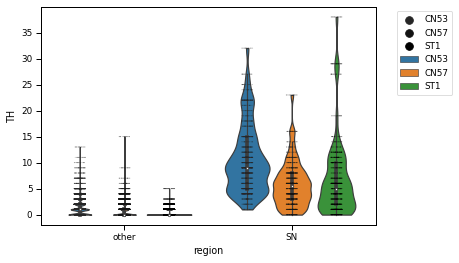

COL1A1


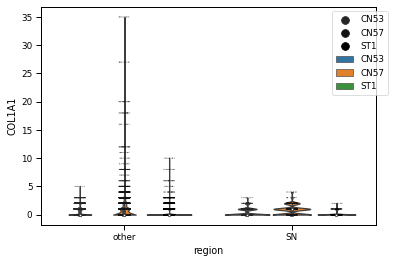

RET


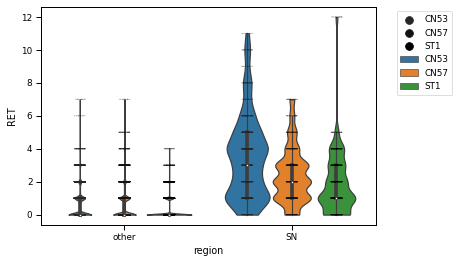

In [140]:
for gene in genes:
    print(gene)
    sns.despine()
    sns.stripplot(data=strip_df_stacked, x='region', y=gene, hue='slide', 
                  dodge=True, jitter=0.1, size=1, alpha=0.2, color='black')
    sns.violinplot(data=strip_df_stacked, x='region', y=gene, hue='slide', 
                   dodge=True, cut=0, scale='count')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.savefig(f'{output}{gene}_distribution_regions.png', bbox_inches='tight', dpi=400)
#     plt.show()

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
import scipy

In [19]:
strip_df_perc[['G_content', celltypes[12]]]

,G_content,Dopaminergic neurons; mouse
ST3_C2_X8.01_14.97,0.046110,0.006002
ST3_C2_X20.06_17.98,0.484828,0.085239
ST3_C2_X6.88_12.04,0.036426,0.009146
ST3_C2_X4.95_18.03,0.029175,0.004995
ST3_C2_X6.88_22.02,0.050242,0.007665
...,...,...
CN53_C1_X14.81_9.07,0.092470,0.013330
CN53_C1_X23.16_4.17,0.074295,0.011023
CN53_C1_X24.14_6.07,0.098265,0.013849
CN53_C1_X19.95_2.09,0.090738,0.011980


In [54]:
data = strip_df_perc[strip_df_perc['G_content']>0.1]
data

,feature,orig_feature,array_row,array_col,in_tissue,sample,slide,x,y,new_x,...,"Ivy and MGE-derived neurogliaform cells, cortex/hippocampus",Neuroblasts,Neuronal intermidate progenitor cells,"Non-border Cck interneurons, cortex/hippocampus",Oligodendrocytes,"R-LM border Cck interneurons, cortex/hippocampus","Sleep-active, long-range projection interneurons, cortex/hippocampus",Subventricular zone radial glia-like cells,Vascular leptomeningeal cells; mouse,Vascular; mouse
CN57_E1_X7.81_7.0,X7.81_7.0,X8_7,8.0,7.0,1,CN57_E1,CN57,8,7,7.81,...,0.003214,0.015338,0.036035,0.002383,0.115265,0.004751,0.057244,0.037301,0.044193,0.032900
CN57_E1_X21.72_8.0,X21.72_8.0,X22_8,22.0,8.0,1,CN57_E1,CN57,22,8,21.72,...,0.002391,0.021005,0.023145,0.002176,0.099349,0.003607,0.054904,0.052364,0.042368,0.026908
CN57_E1_X27.92_11.05,X27.92_11.05,X28_11,28.0,11.0,1,CN57_E1,CN57,28,11,27.92,...,0.001939,0.020280,0.022541,0.003997,0.102897,0.007175,0.069024,0.079402,0.032764,0.031785
CN57_E2_X9.89_20.07,X9.89_20.07,X10_20,10.0,20.0,1,CN57_E2,CN57,10,20,9.89,...,0.001455,0.019129,0.026001,0.005264,0.069454,0.004591,0.063054,0.103163,0.045635,0.037152
CN53_E1_X15.32_6.0,X15.32_6.0,X15_6,15.0,6.0,1,CN53_E1,CN53,15,6,15.32,...,0.001760,0.018519,0.019573,0.006551,0.077828,0.001446,0.060874,0.189793,0.026850,0.019459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CN54_E2_X12.81_25.87,X12.81_25.87,X13_26,13.0,26.0,1,CN54_E2,CN54,13,26,12.81,...,0.001171,0.007855,0.003265,0.020966,0.046641,0.000742,0.014507,0.298422,0.012852,0.037679
CN54_E2_X16.94_4.94,X16.94_4.94,X17_5,17.0,5.0,1,CN54_E2,CN54,17,5,16.94,...,0.000673,0.009249,0.002343,0.019689,0.038005,0.001196,0.006727,0.344461,0.016232,0.038692
CN54_E2_X15.9_4.91,X15.9_4.91,X16_5,16.0,5.0,1,CN54_E2,CN54,16,5,15.90,...,0.002368,0.006386,0.006510,0.010944,0.045453,0.000883,0.013110,0.322862,0.011856,0.032516
CN54_E2_X11.94_24.93,X11.94_24.93,X12_25,12.0,25.0,1,CN54_E2,CN54,12,25,11.94,...,0.001728,0.013491,0.006454,0.013041,0.038185,0.001261,0.024758,0.287795,0.013696,0.038153


In [55]:
data[celltypes] = data[celltypes]*100
data['G_content'] = data['G_content']*100

/tmp/ipykernel_37006/3796542474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[celltypes] = data[celltypes]*100
/tmp/ipykernel_37006/3796542474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['G_content'] = data['G_content']*100


Assessing Astrocytes; mouse
[-0.7466528] 30.194154926745707


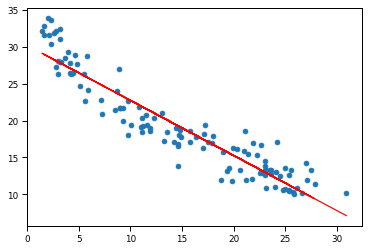

Pearson: (-0.9392371733127775, 1.2493567755208288e-56)
Spearmann: SpearmanrResult(correlation=-0.9471421626501839, pvalue=4.228297618462856e-60)
Assessing Axo-axonic, cortex/hippocampus
[8.30773579] 10.539310851101531


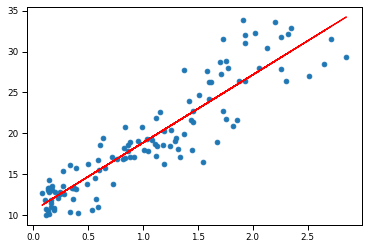

Pearson: (0.9147377842283011, 2.8984674289376877e-48)
Spearmann: SpearmanrResult(correlation=0.9208972845336482, pvalue=4.1711732750738908e-50)
Assessing Basket and bistratified cells, cortex/hippocampus
[-7.50433066] 27.507526826801236


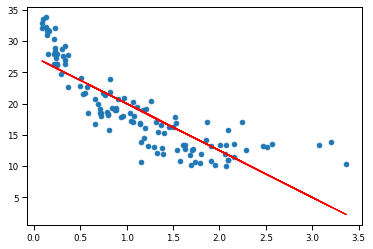

Pearson: (-0.8450057363600998, 7.232175370733848e-34)
Spearmann: SpearmanrResult(correlation=-0.903659976387249, pvalue=2.8095471060116656e-45)
Assessing CGE-derived neurogliaform cells Cxcl14+, cortex/hippocampus
[-67.97677242] 30.965849112355073


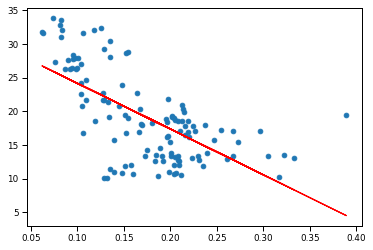

Pearson: (-0.6476613099943124, 1.302341895480969e-15)
Spearmann: SpearmanrResult(correlation=-0.6155983054378775, pvalue=7.312055884165251e-14)
Assessing CGE-derived neurogliaform cells, cortex/hippocampus
[-43.04215683] 27.5402312200789


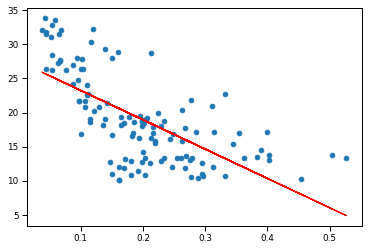

Pearson: (-0.6715006418187908, 4.7049325044872374e-17)
Spearmann: SpearmanrResult(correlation=-0.6799361066740744, pvalue=1.3481393260232787e-17)
Assessing Cholinergic interneurons; mouse
[-2.55888842] 27.79454587537422


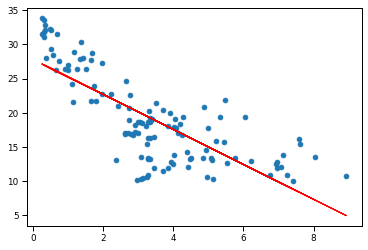

Pearson: (-0.7764096650625282, 2.0578218461226773e-25)
Spearmann: SpearmanrResult(correlation=-0.7480311132717549, pvalue=9.510938885270857e-23)
Assessing Cholinergic neurons, midbrain red nucleus
[2.47501926] 8.55354632516014


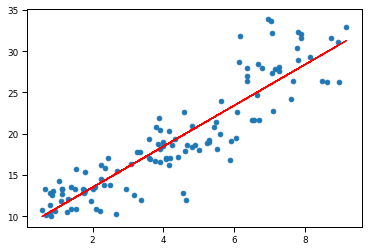

Pearson: (0.9027786557302757, 4.682994578354555e-45)
Spearmann: SpearmanrResult(correlation=0.9047503298840196, pvalue=1.483004238416145e-45)
Assessing Cortical projection neurons; mouse
[-3.87255288] 19.858243467732418


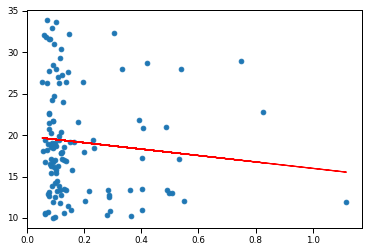

Pearson: (-0.10059922326948888, 0.27428374798304755)
Spearmann: SpearmanrResult(correlation=-0.14486422668240848, pvalue=0.11441928256243178)
Assessing D1 Medium Spiny Neurons; mouse
[10.83994067] 11.203941934104131


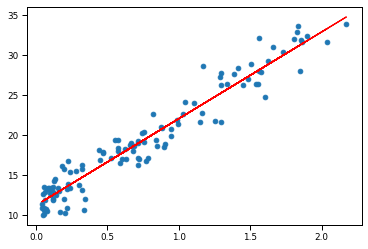

Pearson: (0.9668816905508615, 7.877551329313234e-72)
Spearmann: SpearmanrResult(correlation=0.9480241683450238, pvalue=1.6076971463801522e-60)
Assessing D1/D2 Medium Spiny Neurons, striatum
[2.08562693] 11.53517072179951


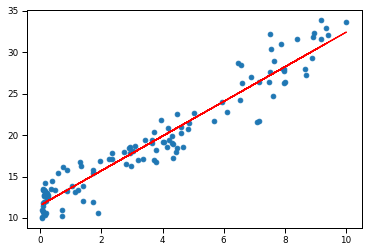

Pearson: (0.961918595460601, 2.581614732783486e-68)
Spearmann: SpearmanrResult(correlation=0.9502465448989511, pvalue=1.302289667811076e-61)
Assessing D2 Medium Spiny Neurons; mouse
[11.2396448] 9.43092301552241


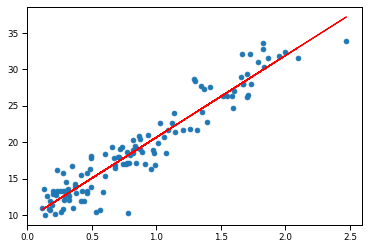

Pearson: (0.9502910917917695, 1.236860296249033e-61)
Spearmann: SpearmanrResult(correlation=0.9231127161608443, pvalue=8.33479069461183e-51)
Assessing Dentate gyrus radial glia-like cells
[1.33782123] 7.979105010703391


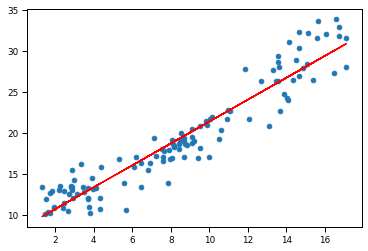

Pearson: (0.949184040695895, 4.3919469434192274e-61)
Spearmann: SpearmanrResult(correlation=0.9473088408917285, pvalue=3.5266081838908597e-60)
Assessing Dopaminergic neurons; mouse
[-0.9962845] 24.26202259267861


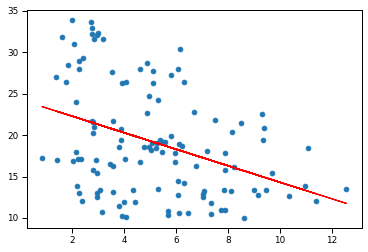

Pearson: (-0.38205948823155433, 1.6625956713747454e-05)
Spearmann: SpearmanrResult(correlation=-0.3591429960413917, pvalue=5.6185973411445997e-05)
Assessing Excitatory neurons, amygdala
[3.89113607] 12.671822582487426


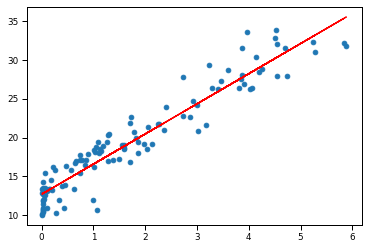

Pearson: (0.9540459405793076, 1.3409536675609398e-63)
Spearmann: SpearmanrResult(correlation=0.9415723314119034, pvalue=1.3253150877202318e-57)
Assessing Excitatory neurons, hippocampus CA1
[19.73834853] 15.672380541262795


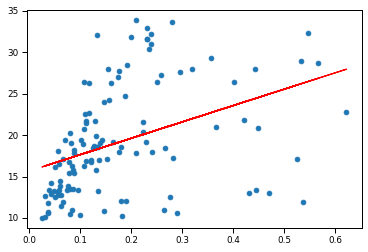

Pearson: (0.4032391390465391, 4.960363817791968e-06)
Spearmann: SpearmanrResult(correlation=0.5295923328008888, pvalue=4.99172798545681e-10)
Assessing Excitatory neurons, hippocampus CA3
[30.52743545] 13.484527363406531


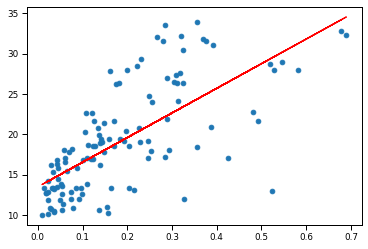

Pearson: (0.6985669713341801, 7.316259763423412e-19)
Spearmann: SpearmanrResult(correlation=0.7392457809570108, pvalue=5.398608418827846e-22)
Assessing Hippocamposeptal projection, cortex/hippocampus
[-17.56917724] 27.756696123673343


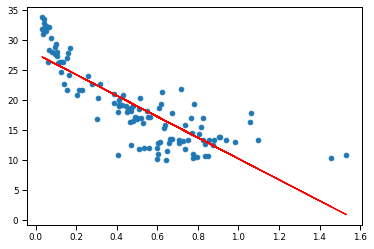

Pearson: (-0.8352401516847245, 1.9670955380135126e-32)
Spearmann: SpearmanrResult(correlation=-0.8352663379401346, pvalue=1.9503159196654133e-32)
Assessing Immune cells; mouse
[-4.28817437] 29.594223765979386


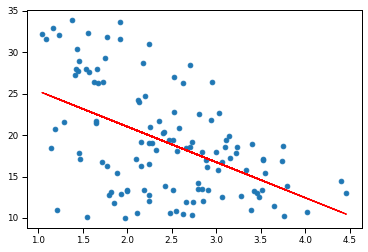

Pearson: (-0.5022257774249979, 5.085383129470263e-09)
Spearmann: SpearmanrResult(correlation=-0.44639211056323347, pvalue=3.218601050582289e-07)
Assessing Inhibitory neurons, midbrain
[-1.24836009] 30.881807479050053


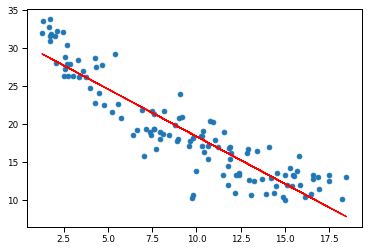

Pearson: (-0.9116205135054747, 2.1976997619572215e-47)
Spearmann: SpearmanrResult(correlation=-0.9048197791513298, pvalue=1.4234899869641383e-45)
Assessing Inhibitory neurons, septal nucleus
[25.1520972] 8.245888413687368


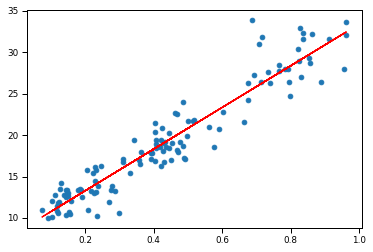

Pearson: (0.949968855926095, 1.7938975567156176e-61)
Spearmann: SpearmanrResult(correlation=0.9380165289256197, pvalue=3.897126926038064e-56)
Assessing Interneuron-selective interneurons, cortex/hippocampus
[-28.84181121] 29.27717979831109


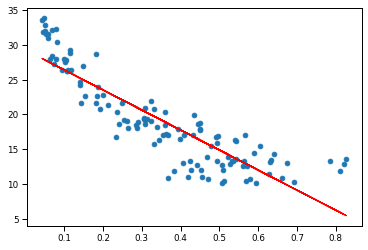

Pearson: (-0.883016131283484, 1.4253282033618737e-40)
Spearmann: SpearmanrResult(correlation=-0.8964789221473711, pvalue=1.5750366429971377e-43)
Assessing Ivy and MGE-derived neurogliaform cells, cortex/hippocampus
[-46.31407988] 26.59484519337474


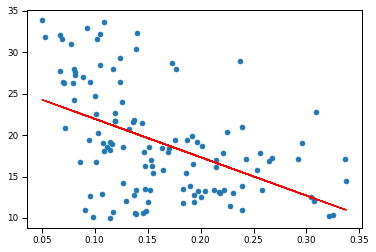

Pearson: (-0.4827700892346495, 2.3487171088268118e-08)
Spearmann: SpearmanrResult(correlation=-0.48389471491075764, pvalue=2.155445068577908e-08)
Assessing Neuroblasts
[-3.90138045] 27.898399696286106


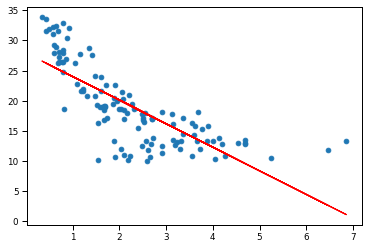

Pearson: (-0.7681935779197784, 1.329812332624468e-24)
Spearmann: SpearmanrResult(correlation=-0.8254809361761232, pvalue=4.3319770833920425e-31)
Assessing Neuronal intermidate progenitor cells
[-4.13576949] 27.528598415302728


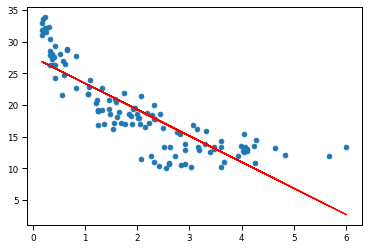

Pearson: (-0.8476567581426563, 2.835809879845639e-34)
Spearmann: SpearmanrResult(correlation=-0.8969581220918119, pvalue=1.2152085425935447e-43)
Assessing Non-border Cck interneurons, cortex/hippocampus
[9.41499166] 11.757087589927663


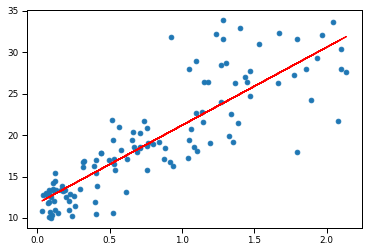

Pearson: (0.8538909073693506, 2.919213036131349e-35)
Spearmann: SpearmanrResult(correlation=0.881575109382596, pvalue=2.809936723301077e-40)
Assessing Oligodendrocytes
[-1.62216219] 33.33625241524358


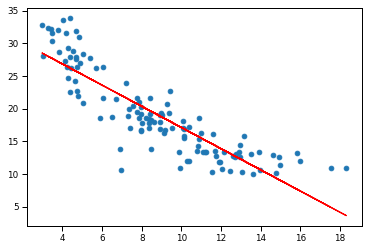

Pearson: (-0.8729272465486977, 1.3829459102746764e-38)
Spearmann: SpearmanrResult(correlation=-0.8967497742898811, pvalue=1.3604814932820072e-43)
Assessing R-LM border Cck interneurons, cortex/hippocampus
[-10.38299533] 22.919264338282645


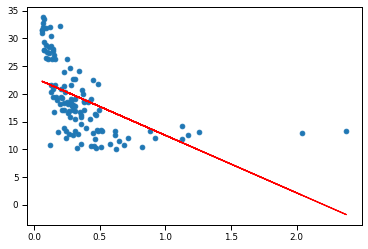

Pearson: (-0.5328132810910677, 3.746351635475481e-10)
Spearmann: SpearmanrResult(correlation=-0.7658448503368288, pvalue=2.2353300209665276e-24)
Assessing Sleep-active, long-range projection interneurons, cortex/hippocampus
[-2.00595681] 29.497392955103187


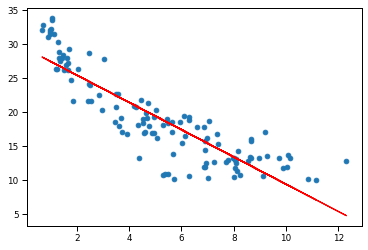

Pearson: (-0.874368897638931, 7.369849242974757e-39)
Spearmann: SpearmanrResult(correlation=-0.876748385304535, pvalue=2.5635569726212923e-39)
Assessing Subventricular zone radial glia-like cells
[0.56319023] 10.134322092488956


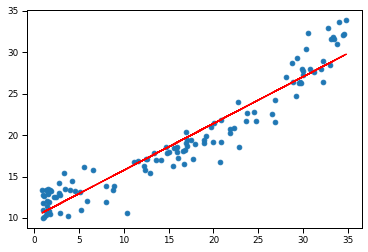

Pearson: (0.9554797632614006, 2.1545157643609468e-64)
Spearmann: SpearmanrResult(correlation=0.9587124105840681, pvalue=2.7713710667183806e-66)
Assessing Vascular leptomeningeal cells; mouse
[-4.82127075] 32.144661476527595


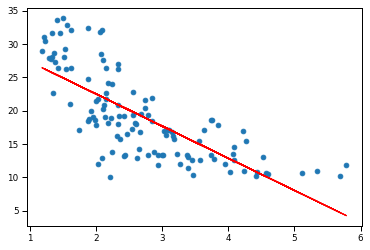

Pearson: (-0.748095578882964, 9.388051790302316e-23)
Spearmann: SpearmanrResult(correlation=-0.7984790610459058, pvalue=9.01757443820717e-28)
Assessing Vascular; mouse
[5.37502476] 4.043449984432005


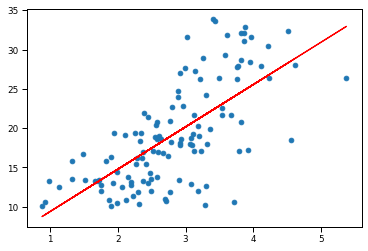

Pearson: (0.6854398977146055, 5.830601089745615e-18)
Spearmann: SpearmanrResult(correlation=0.6871032710604902, pvalue=4.509387160290196e-18)


<Figure size 432x288 with 0 Axes>

In [57]:
def f(x,a=1,b=0):
    return a*x + b

for idx, ct in enumerate(celltypes):
    print(f'Assessing {ct}')

    model = LinearRegression()
    model.fit(data[ct].to_numpy().reshape(-1,1), data['G_content'].to_numpy())
    print(model.coef_, model.intercept_)

    plt.scatter(data[celltypes[idx]], data['G_content'])
    plt.plot(data[celltypes[idx]], 
             f(data[celltypes[idx]], a=model.coef_, b=model.intercept_), 
             color='red')
    plt.show()
    plt.clf()

    print(f"Pearson: {scipy.stats.pearsonr(data['G_content'], data[celltypes[idx]])}")
    print(f"Spearmann: {scipy.stats.spearmanr(data['G_content'], data[celltypes[idx]])}")

In [72]:
def plot_celltype_region_violins(celltype_region_df, 
                                 all_celltypes, 
                                 singler_counts, 
                                 output, 
                                 omit_region=[]):
    output = output + 'common_analysis/'
    kept_regions = [r for r in celltype_region_df['region'].unique() if r not in omit_region]
    print(kept_regions)
    celltype_region_df = celltype_region_df[celltype_region_df['region'].isin(kept_regions)]
    singler_celltypes = singler_counts.index.to_list()
    

    celltype_region_df_singler = celltype_region_df.copy()
    non_singler_celltypes = [x for x in all_celltypes if x not in singler_celltypes]
    celltype_region_df_singler['Other'] = celltype_region_df_singler[non_singler_celltypes].sum(axis=1)
    celltype_region_df_singler.drop(non_singler_celltypes, inplace=True, axis=1)

    
    for df in [celltype_region_df_singler, celltype_region_df]:
        celltypes = [x for x in df.columns if x in set((singler_celltypes + all_celltypes))]
        
        vmax = df[celltypes].max().max()
        print(vmax)
        cols = 2*2
        rows = m.ceil(len(celltypes)/(cols/2))

        fig, ax = plt.subplots(nrows=rows, ncols=cols,
                               sharey=False,
                               figsize=(3*cols, 4*rows),
                               gridspec_kw={'width_ratios':[4,3]*int((cols/2))})
        r, c = 0, 0

        cmap = cm.get_cmap('Set1')
        handles = [plt.plot([], color=cmap(c), ls="", marker="o")[0] for c in range(len(df['region'].unique()))]
        labels = df['region'].unique()
        print(labels)
        sns.despine(trim=False)
        for idx, ct in enumerate(celltypes):
            sns.violinplot(y=ct, x='slide', ax=ax[r, c],
                           hue='region',
                           cut=True,
                           legend=False,
                           palette='Set1',
                           #scale='area',
                           data=df,
                           scale_hue=True,
                           inner=None)
            sns.stripplot(y=ct, x='slide', ax=ax[r, c],
                          hue='region',
                          dodge=True,
                          color='black',
                          alpha=0.05,
                          size=1,
                          data=df)

            sns.violinplot(x='region', y=ct, ax=ax[r, c+1],
                           cut=True,
                           #scale='count',
                           palette='Set2',
                           data=df,
                           inner=None
                         )
            sns.stripplot(x='region', y=ct, ax=ax[r, c+1],
                          jitter=0.1,
                          dodge=True,
                          color='black',
                          alpha=0.05,
                          size=1,
                          data=df)


            ax[r, c].get_legend().remove()
            ax[r, c].set_ylim(0, vmax)
            ax[r, c+1].set_ylim(0, vmax)
#             ax[r, c+1].get_legend().remove()
            ax[r, c+1].get_yaxis().set_visible(False)
            ax[r, c+1].spines['left'].set_visible(False)
            ax[r, c].set_ylabel('')
            ax[r, c+1].set_xlabel('Combined')
            #ax[r, c+1].set_frame_on(False)
            ax_ct = fig.add_subplot(rows, int(cols/2), idx+1, frameon = False)
            ax_ct.set_xticks([])
            ax_ct.set_yticks([])
            if ct in singler_celltypes:
                ax_ct.axhline(y=singler_counts[ct]/singler_counts.sum(),
                              xmin=-0.05,
                              xmax=1.1,
                              c="red",
                              linewidth=2,
                              linestyle='--')
            ax_ct.set_title('\n'.join(wrap(ct, 40)))

            if c+3 >= cols:
                c = 0
                r += 1
            else:
                c = c+2
        # remove unused plots
        if (idx+1)*2 < rows*cols:
            for i in range(1, (rows*cols - (idx+1)*2)+1):
                print(r, i*-1)
                ax[r, i*-1].set_visible(False)


        ax[0, cols-1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left',
                             title='\n'.join(wrap('Feature area/slide', 20)))
        plt.tight_layout(pad=0.4)
        if len(celltypes) == len(singler_celltypes):
            file_path = output + 'Celltype_distribution_violin_SingleR.pdf'
        elif len(celltypes) > len(singler_celltypes):
            file_path = output + 'Celltype_distribution_violin_complete.png'
#         plt.savefig(file_path, bbox_inches='tight', dpi=500)
        plt.show()


In [97]:
output = f"{'/'.join(deconv_h5ad_path.split('/')[:-1])}/"
output

'../../results/cell2loc_res/L5_CTX_M_STR_description_selection_2000_astro-merge/SN/cell2location_map/'

['other', 'SN']
0.5561575836576803
['other' 'SN']
3 -1
3 -2


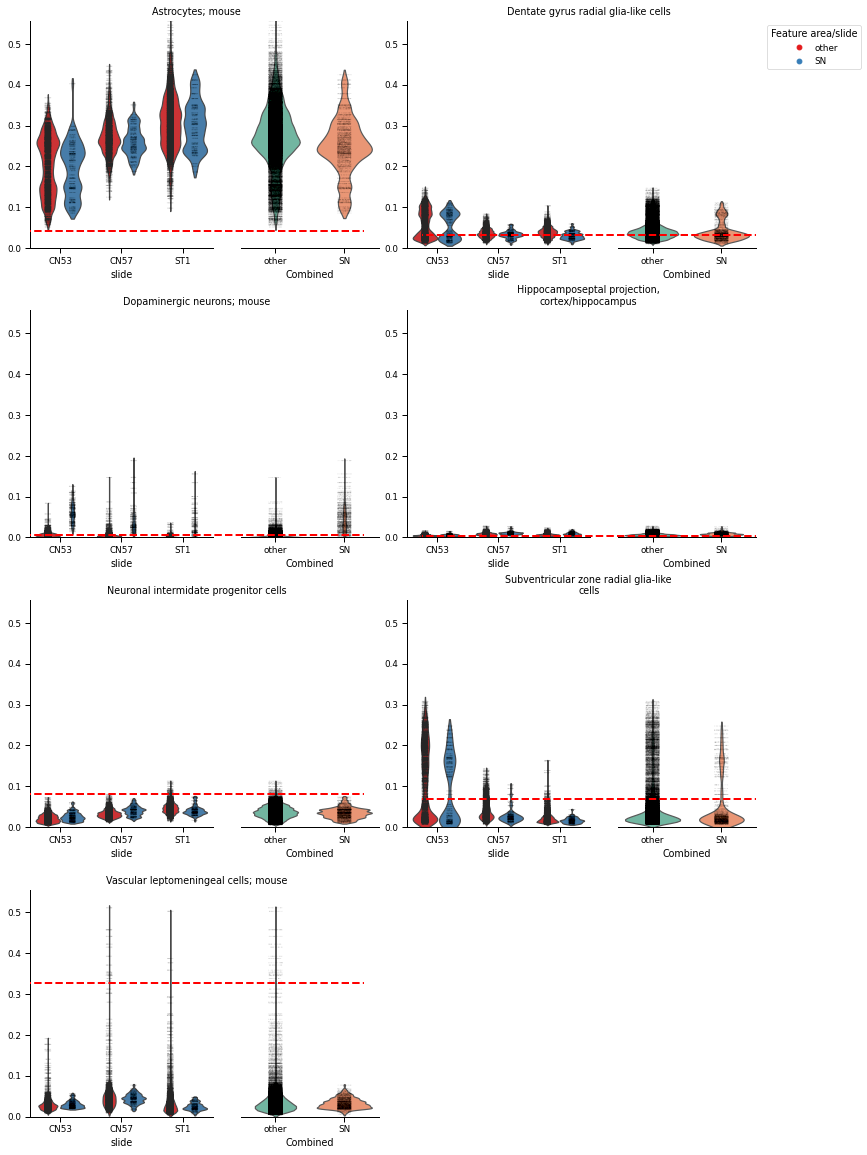

0.5561575836576803
['other' 'SN']
15 -1
15 -2


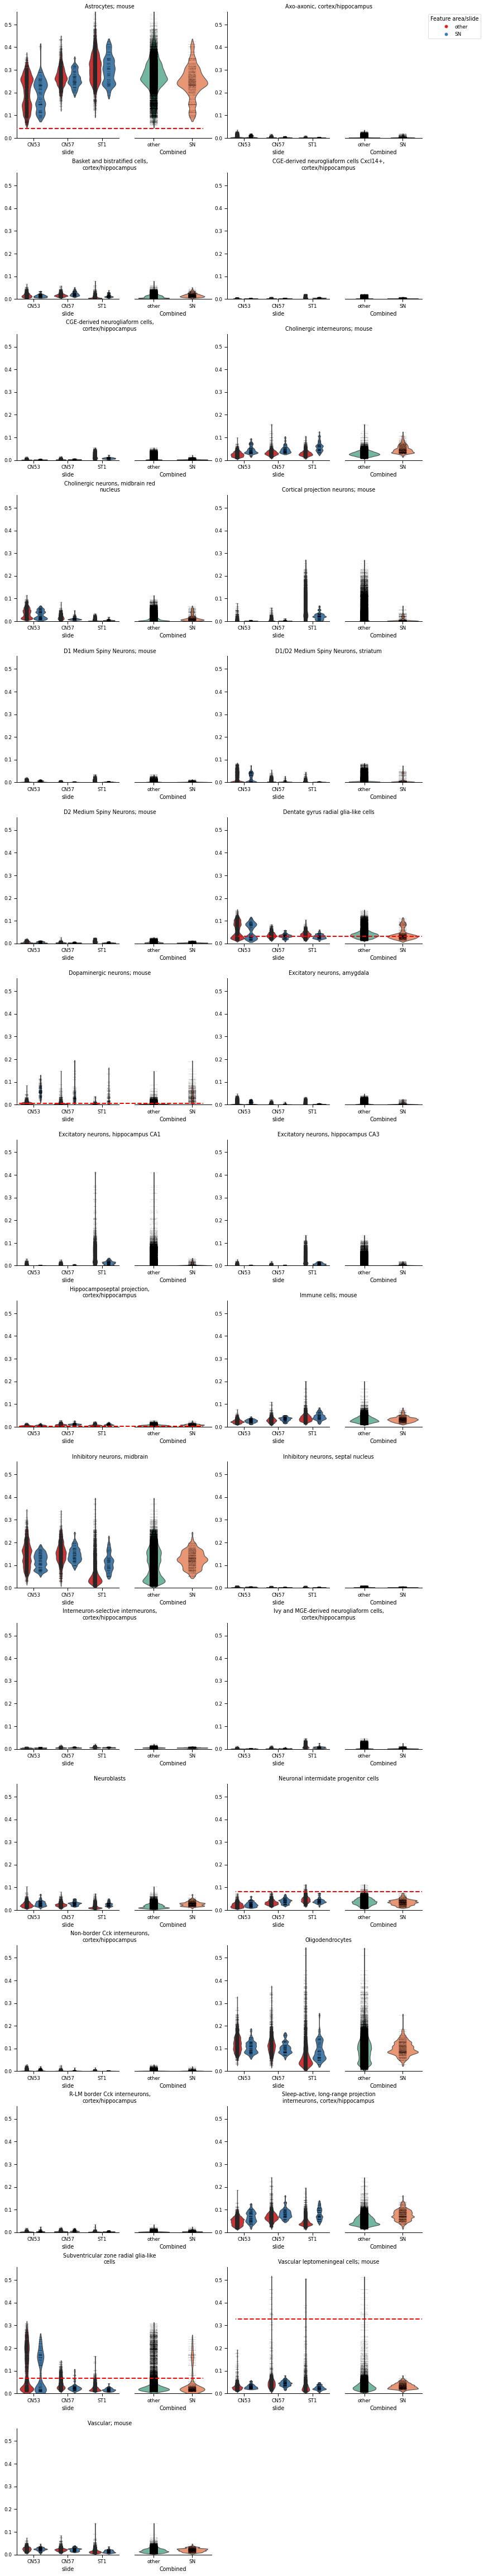

In [98]:
plot_celltype_region_violins(strip_df_stacked,
                             singler_counts = singleR_counts,
                             all_celltypes=celltypes.to_list(), 
                             output= output,
                             omit_region=[])

['STR', 'TX']
0.47718758788510773
['STR' 'TX']
3 -1
3 -2


<Figure size 432x288 with 0 Axes>

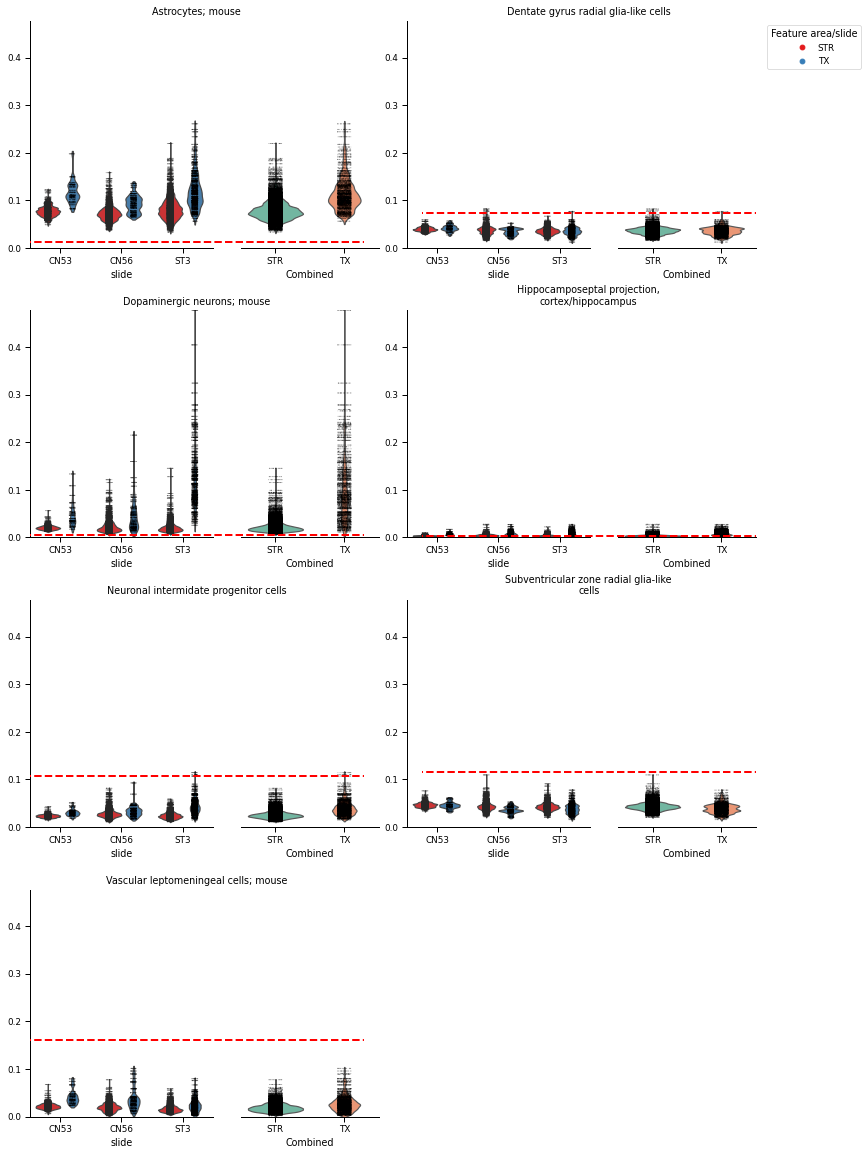

0.47718758788510773
['STR' 'TX']


KeyboardInterrupt: 

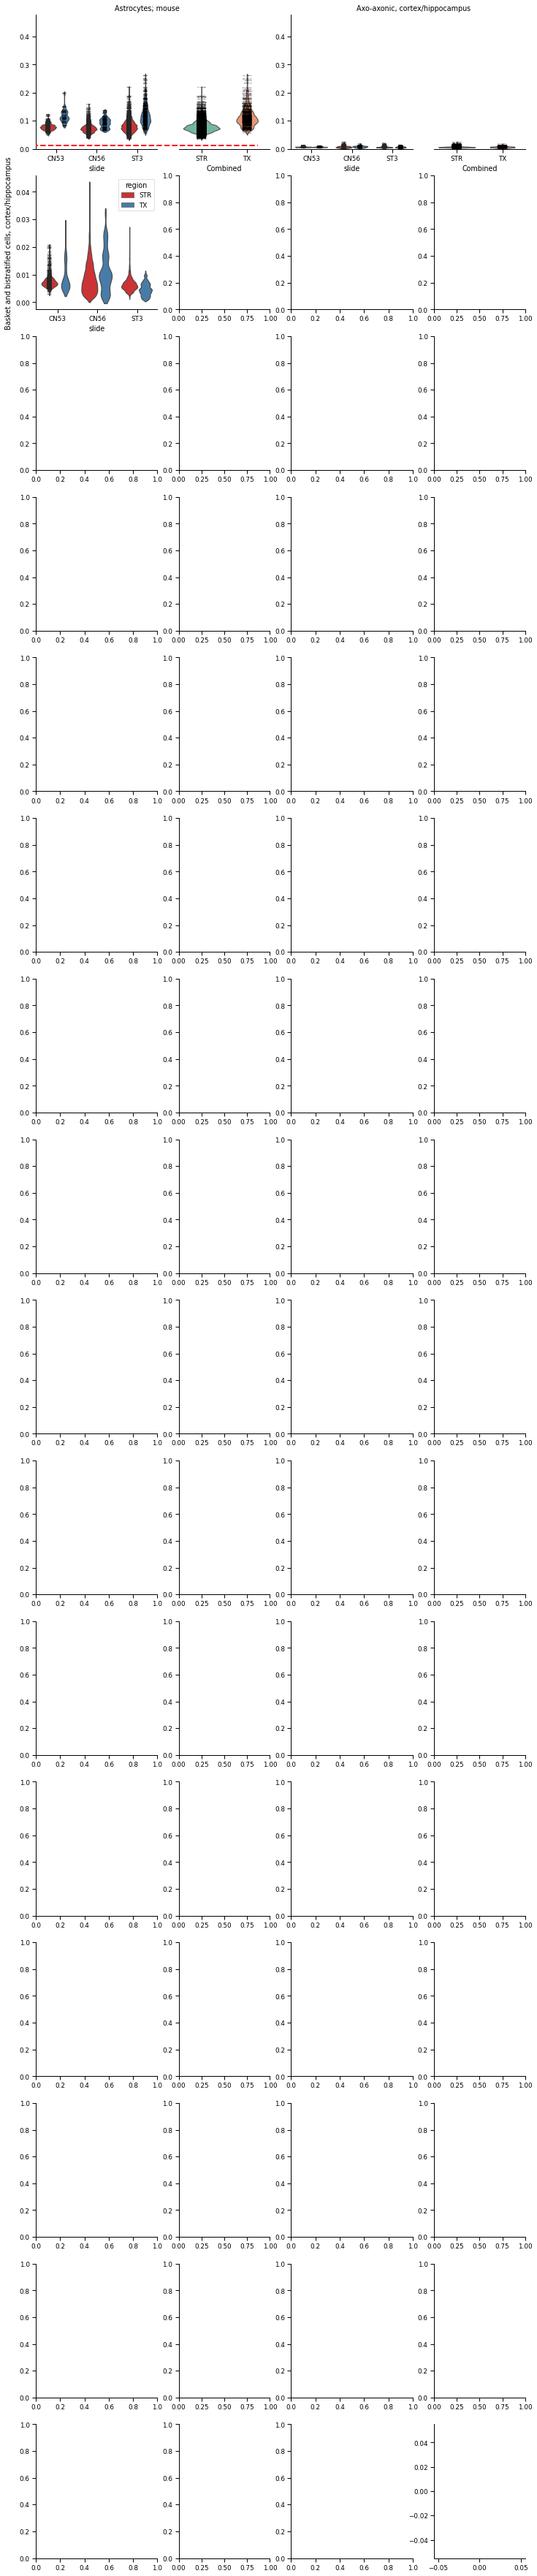

In [215]:
plt.clf()
plot_celltype_region_violins(strip_df_stacked,
                             singler_counts = singleR_counts,
                             all_celltypes=celltypes.to_list(), 
                             output=output, 
                             omit_region=[])

In [ ]:
feature_dict, gene_feature_dict = import_gene__features_mtx(folder=args.stdata)

# create a dictionary with scaled gene-feature matrices
scaled_gene_feature_dict = {}
for well, st_df in gene_feature_dict.items():
    scaled_gene_feature_dict[well] = scale_df(st_df)

singler_umap = pd.read_csv(args.singler_umap, sep='\t', header=0, index_col=0)

VM_STR_Ctx_final_ref_red = pd.read_csv(args.singler_selection + 'SingleR-result_dataframe.tsv', sep='\t')
VM_STR_Ctx_final_ref_full = pd.read_csv(args.singler_full + 'SingleR-result_dataframe.tsv', sep='\t')

# the following block will be only plotted and then the variables are rewritten
singler_counts, singler_df = get_singler_data(VM_STR_Ctx_final_ref_full,
                                              singler_umap)
plot_singleR(singler_counts, singler_df,
             output=args.singler_full,
             dataset='full')

# the variables from the folowing block are used for analysis
singler_counts, singler_df = get_singler_data(VM_STR_Ctx_final_ref_red, singler_umap)
plot_singleR(singler_counts, singler_df,
             output=args.singler_selection,
             dataset='selection')


# Here begins the analysis for striatal tissue with TX

str_cluster_df_combined = get_combined_cluster_df(args.cluster_folder_striatum)
str_cluster_wells = str_cluster_df_combined['well'].unique()

human_clusters = get_human_clusters(str_cluster_df_combined)

str_cluster_scaled_gene_df = merge_stdata_cluster_df(scaled_dict=scaled_gene_feature_dict,
                                                 cluster_df_combined=str_cluster_df_combined,
                                                 marker_dict=region_marker_dict)

# select striatal clusters based on the selected genes
str_cluster_stdata_df, str_region_df_grouped = get_region_clusters_score(str_cluster_scaled_gene_df,
                                                  region_marker_dict,
                                                  region='STR',
                                                  additional_clusters=human_clusters,
                                                  animal_mapping=animal_mapping)
plot_region_assignment(str_cluster_stdata_df,
                       str_region_df_grouped,
                       region='STR',
                       output=args.striatal_deconvolution_folders)

str_celltype_region_df, str_stereoscope_folders, all_ct  = merge_celltypes_region_assignment(args.striatal_deconvolution_folders,
                                                                                             str_cluster_stdata_df)
plot_celltype_region_violins(str_celltype_region_df,
                             all_ct,
                             singler_counts,
                             output=args.striatal_deconvolution_folders,
                             omit_region=['Other', 'Partial'])

# plot celltype distribution inside the transplant ('TX')
for stereoscope_folder in str_stereoscope_folders:
    wells = [x.split('_stdata')[0] for x in os.listdir(stereoscope_folder) if '_stdata' in x]
    for well in wells:
        temp_celltype_region_df = str_celltype_region_df[str_celltype_region_df['region'] == 'TX']
        temp_celltype_region_df = temp_celltype_region_df[temp_celltype_region_df['well'] == well]
        temp_celltype_region_df.index = temp_celltype_region_df['feature']
        temp_celltype_region_df = temp_celltype_region_df[all_ct]

        plot_celltype_contribution(well=well,
                                   folder=stereoscope_folder + "selection_visuals/selected_areas_plots/complete/",
                                   stereoscope_df=temp_celltype_region_df,
                                   feature_dict=feature_dict,
                                   scales=['absolute'])

        temp_celltype_region_df = temp_celltype_region_df[[x for x in temp_celltype_region_df.columns if x in singler_counts.index]]

        plot_celltype_contribution(well=well,
                                   folder=stereoscope_folder + "selection_visuals/selected_areas_plots/singler/",
                                   stereoscope_df=temp_celltype_region_df,
                                   feature_dict=feature_dict,
                                   scales=['absolute'])


# Here begins analysis of SN containing tissues/wells

sn_cluster_df_combined = get_combined_cluster_df(args.cluster_folder_nigra)
sn_cluster_wells = sn_cluster_df_combined['well'].unique()

sn_cluster_scaled_gene_df = merge_stdata_cluster_df(scaled_dict=scaled_gene_feature_dict,
                                                 cluster_df_combined=sn_cluster_df_combined,
                                                 marker_dict=region_marker_dict)

# select striatal clusters based on the selected genes
sn_cluster_stdata_df, sn_region_df_grouped = get_region_clusters_score(sn_cluster_scaled_gene_df,
                                                 region_marker_dict,
                                                 region='SN',
                                                 animal_mapping=animal_mapping)
plot_region_assignment(sn_cluster_stdata_df,
                       sn_region_df_grouped,
                       output=args.nigral_deconvolution_folders)

# Create violin plots for cell type distribution in regions

sn_celltype_region_df, sn_stereoscope_folders, all_ct  = merge_celltypes_region_assignment(args.nigral_deconvolution_folders,
                                                                                           sn_cluster_stdata_df)
plot_celltype_region_violins(sn_celltype_region_df,
                             all_ct, singler_counts,
                             #region='SN',
                             output=args.nigral_deconvolution_folders)

# plot celltype distribution inside the transplant ('TX')
for stereoscope_folder in sn_stereoscope_folders:
    wells = [x.split('_stdata')[0] for x in os.listdir(stereoscope_folder) if '_stdata' in x]
    for well in wells:
        temp_celltype_region_df = sn_celltype_region_df[sn_celltype_region_df['region'] == 'SN']
        temp_celltype_region_df = temp_celltype_region_df[temp_celltype_region_df['well'] == well]
        temp_celltype_region_df.index = temp_celltype_region_df['feature']
        temp_celltype_region_df = temp_celltype_region_df[all_ct]

        plot_celltype_contribution(well=well,
                                   folder=stereoscope_folder + "selection_visuals/selected_areas_plots/complete/",
                                   stereoscope_df=temp_celltype_region_df,
                                   feature_dict=feature_dict,
                                   scales=['absolute'])

        temp_celltype_region_df = temp_celltype_region_df[[x for x in temp_celltype_region_df.columns if x in singler_counts.index]]

        plot_celltype_contribution(well=well,
                                   folder=stereoscope_folder + "selection_visuals/selected_areas_plots/singler/",
                                   stereoscope_df=temp_celltype_region_df,
                                   feature_dict=feature_dict,
                                   scales=['absolute'])
